# Aceleração em Data Science - Semana 7

_"Muitas pessoas dizem que há uma linha tênue entre a genialidade e a loucura. Não acho que exista uma linha tênue, eu acho que há um abismo." - Bill Bailey_

### Regressão Linear

#### Dados: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Observação: Os próximos passos foram feitos para que pudessemos observar vieses! Não são formas indicadas de escolher variáveis ou inferenciar sobre os dados.

In [5]:
X = df_train[['GrLivArea', 'OverallQual']]
y = df_train['SalePrice']

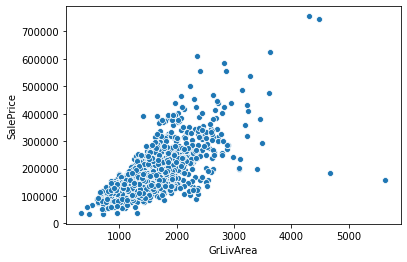

In [6]:
sns.scatterplot(X['GrLivArea'], y)

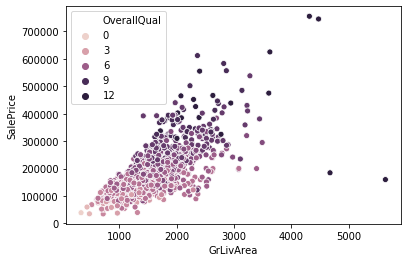

In [7]:
sns.scatterplot(X['GrLivArea'], y, X['OverallQual'])

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
# inferencia sobre os dados 
# os valores abaixo tem em vista os min e max das varáveis
# obs: feito para considerar os vieses

a_x = 334
b_x = 5000
a_y = 50000
b_y = 500000

In [10]:
variacao_y = b_y - a_y
variaca_x = b_x - a_x
variacao_y/variaca_x

96.44234890698671

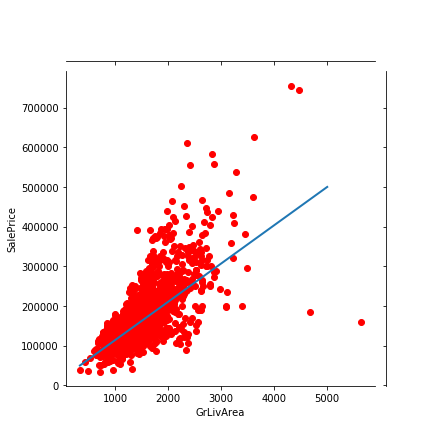

In [11]:
grid = sns.JointGrid(x = X['GrLivArea'], y = y)
grid.plot_joint(plt.scatter, color = 'r')
plt.plot([a_x, b_x], [a_y, b_y], linewidth = 2)

In [12]:
# essa inferência e escolha da reta foi "aleatória" e nos mostra o alto viés

In [13]:
# importo as dependências

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
# instancio

reg = LinearRegression()

In [15]:
reg.fit(X, y)

LinearRegression()

In [16]:
# separo os dados de teste

X_test = pd.read_csv('test.csv')
X_test = X_test[['GrLivArea', 'OverallQual']]
Y_test = pd.read_csv('sample_submission.csv')
Y_test = Y_test['SalePrice']

In [17]:
# realizo o predict

y_pred = reg.predict(X_test)

In [18]:
# observo o erro

mean_absolute_error(y_pred = y_pred, y_true = Y_test)

51373.948758137274

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
# fit só em dados de treino

X_scaled = scaler.fit_transform(X)

In [22]:
# transform em dados de test

X_test_scaled = scaler.transform(X_test)

In [23]:
# refaço o predict

reg = LinearRegression()
reg.fit(X_scaled, y)

LinearRegression()

In [24]:
y_pred = reg.predict(X_test_scaled)

In [25]:
mean_absolute_error(y_pred = y_pred, y_true = Y_test)

51373.948758137274

In [26]:
pd.DataFrame({'coef': reg.coef_, 'coluna': X_test.columns})

,coef,coluna
0,296516.695112,GrLivArea
1,295641.426966,OverallQual


In [27]:
reg.intercept_

-52585.63874254897

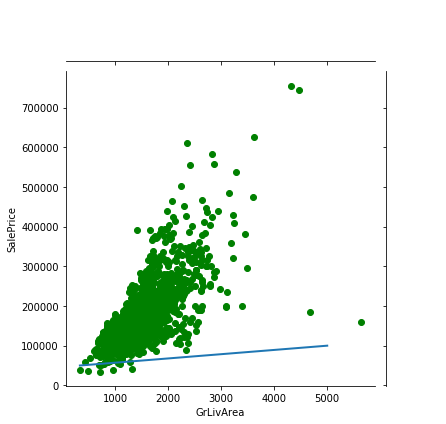

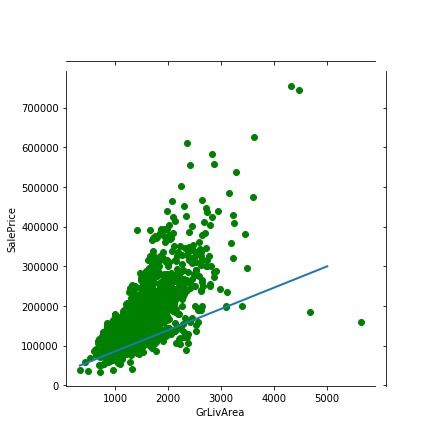

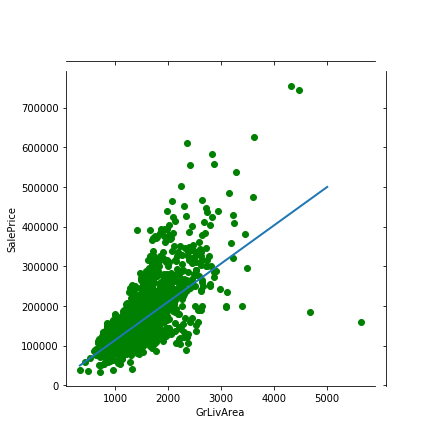

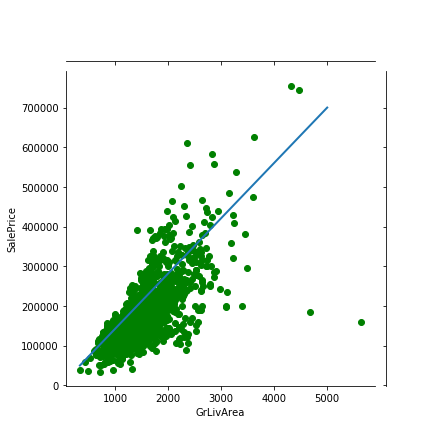

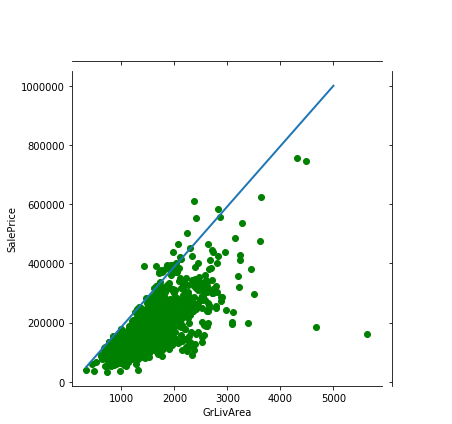

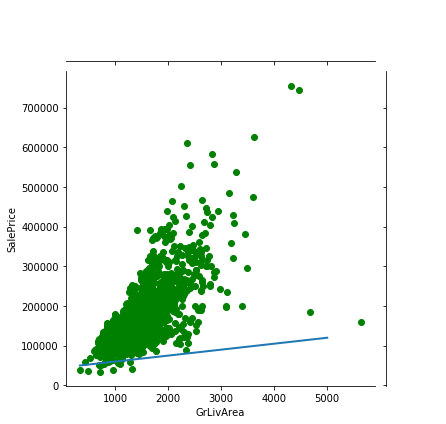

In [28]:
for i in [100000, 300000, 500000, 700000, 1000000, 120000]: # valores aleatorios
    grid = sns.JointGrid(x = X['GrLivArea'], y = y)
    grid.plot_joint(plt.scatter, color = 'g')
    plt.plot([a_x, b_x], [a_y, i], linewidth = 2)
    plt.show()

In [29]:
# "passo" para ajustar a reta! é o tanto que a reta será rotacionada
# a ideia é que com ajustes da reta, vc possa melhorar as predições/ os erros

passo = [100000, 300000, 500000, 700000, 1000000, 120000]
residuos = [100000, 60000, 40000, 80000, 100000, 120000]

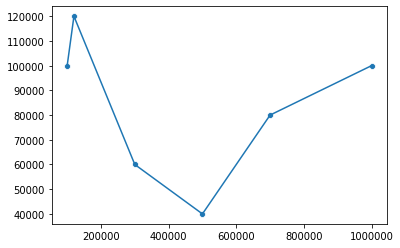

In [30]:
sns.scatterplot(passo, residuos)
sns.lineplot(passo, residuos)

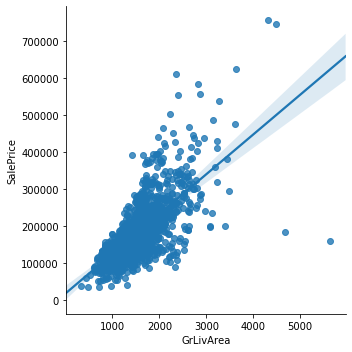

In [31]:
sns.lmplot(x = "GrLivArea", y = 'SalePrice', data = df_train)

# Extra: Introdução simples a AutoML

In [32]:
# pip install tpot
# pip install torch

In [33]:
# pip install torchvision

In [34]:
import torch
import torchvision

In [35]:
from tpot import TPOTRegressor

In [36]:
tp = TPOTRegressor(verbosity = 2, scoring = 'neg_median_absolute_error')

In [37]:
tp.fit(X_scaled, y)



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RidgeCV(input_matrix)


TPOTRegressor(log_file=<ipykernel.iostream.OutStream object at 0x104adbb90>,
              scoring='neg_median_absolute_error', verbosity=2)